In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [78]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
sample=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [79]:
import re

In [80]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
train=train.drop(['Ticket', 'Cabin'], axis=1)
test=test.drop(['Ticket', 'Cabin'], axis=1)

In [82]:
train['Name']=train['Name'].str.extract(r'(\w+[.])')
train['Name']=train['Name'].str[:-1]
test['Name']=test['Name'].str.extract(r'(\w+[.])')
test['Name']=test['Name'].str[:-1]

In [83]:
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Capt          1
Ms            1
Sir           1
Don           1
Jonkheer      1
Countess      1
Lady          1
Name: Name, dtype: int64

In [84]:
train['Name']=train['Name'].replace(['Major','Lady', 'Sir', 'Col', 'Capt', 'Dr',
                                     'Countess', 'Jonkheer', 'Rev' ,'Don', 'Dona'], 'Rare')
train['Name']=train['Name'].replace('Mlle','Miss')
train['Name']=train['Name'].replace(['Mme','Ms'], 'Mrs')

In [85]:
test['Name']=test['Name'].replace(['Major','Lady', 'Sir', 'Col', 'Capt', 'Dr',
                                   'Countess', 'Jonkheer', 'Rev', 'Don', 'Dona'], 'Rare')
test['Name']=test['Name'].replace('Mlle','Miss')
test['Name']=test['Name'].replace(['Mme','Ms'], 'Mrs')

In [86]:
train['Name'].value_counts()

Mr        517
Miss      184
Mrs       127
Master     40
Rare       23
Name: Name, dtype: int64

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,S


Outlier detections

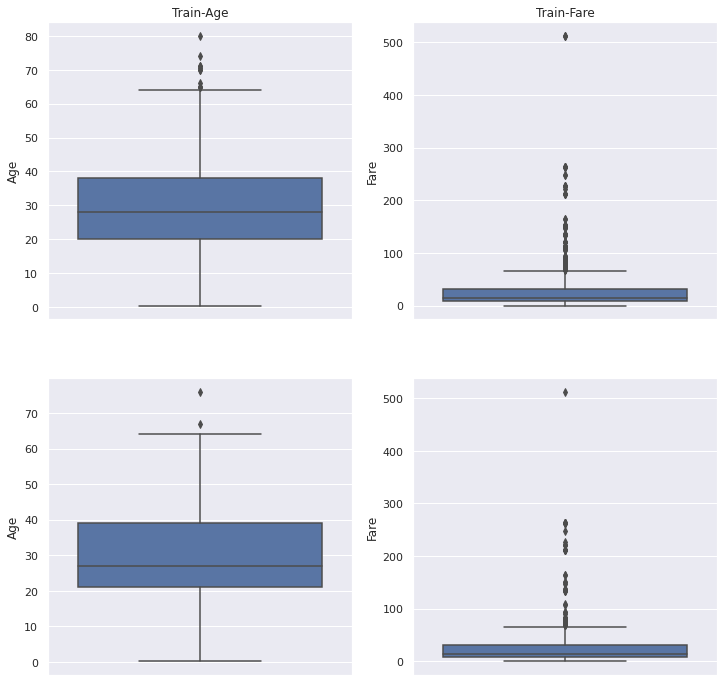

In [88]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
fig1=sns.boxplot(y=train['Age'])
fig1.set(title='Train-Age')
fig2=plt.subplot(2,2,2)
sns.boxplot(y=train['Fare'])
fig2.set(title='Train-Fare')
plt.subplot(2,2,3)
sns.boxplot(y=test['Age'])
plt.subplot(2,2,4)
sns.boxplot(y=test['Fare'])

Gaussian:
Right tail=Mean+3.std
Left tail=Mean-3.std

In [89]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [90]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [91]:
class outlier:
    def __init__(self, data, cols):
        self.data=data
        self.cols=cols
    #########
    def Gaussian(self):
        data=self.data.copy()       
        for col in self.cols:
            mean=self.data[col].mean()
            std=self.data[col].std()
            data.loc[(data[col]<mean-3*std)|(data[col]> mean+3*std), col]=mean
        return data
    ###############
    def IQR(self):
        data=self.data.copy()
        for col in self.cols:
            q1, q2, q3=self.data[col].quantile([0.25, 0.5, 0.75])
            data.loc[(data[col]<2.5*q1-q3)|(data[col]> 2.5*q3-q1), col]=q2
        return data
    ##################
    def Percentile(self):
        data=self.data.copy()
        for col in self.cols:
            mean=self.data.mean()
            q1, q3=self.data[col].quantile([0.05, 0.95])
            data.loc[(data[col]<q1)|(data[col]> q3), col]=mean
        return data
    #################
    def Transforme(self):
        data=self.data.copy()
        for col in self.cols:
            min_=self.data[col].min()
            data[col]=np.log(data[col]-min_+1)
        return data
    #################        

In [92]:
train_outlier=outlier(train, ['Age', 'Fare'])

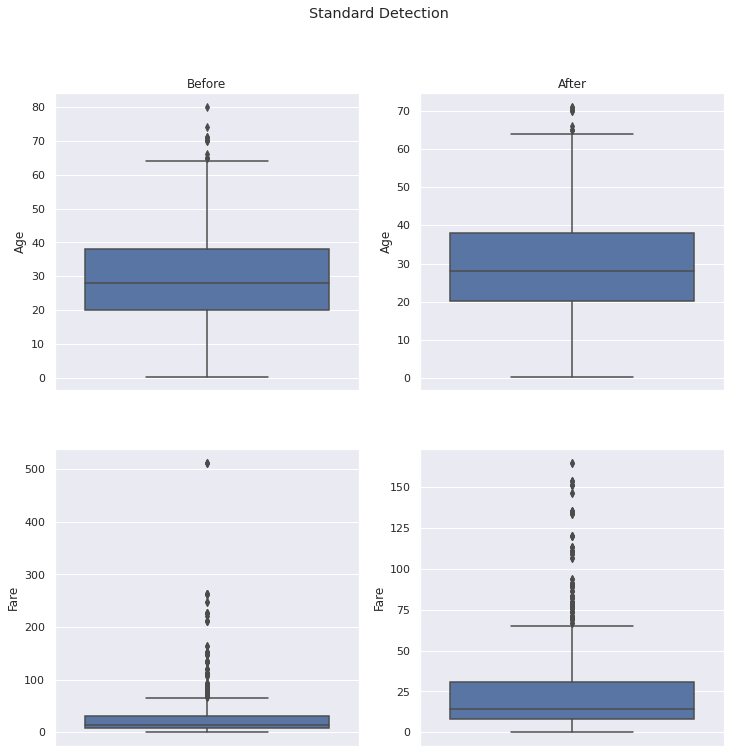

In [93]:
train_gauss=train_outlier.Gaussian()
sns.set()
fig, axes=plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Standard Detection')
sns.boxplot(y=train['Age'], ax=axes[0,0])
axes[0,0].set(title='Before')
sns.boxplot(y=train_gauss['Age'], ax=axes[0,1])
axes[0,1].set(title='After')
sns.boxplot(y=train['Fare'], ax=axes[1,0])
sns.boxplot(y=train_gauss['Fare'], ax=axes[1,1])

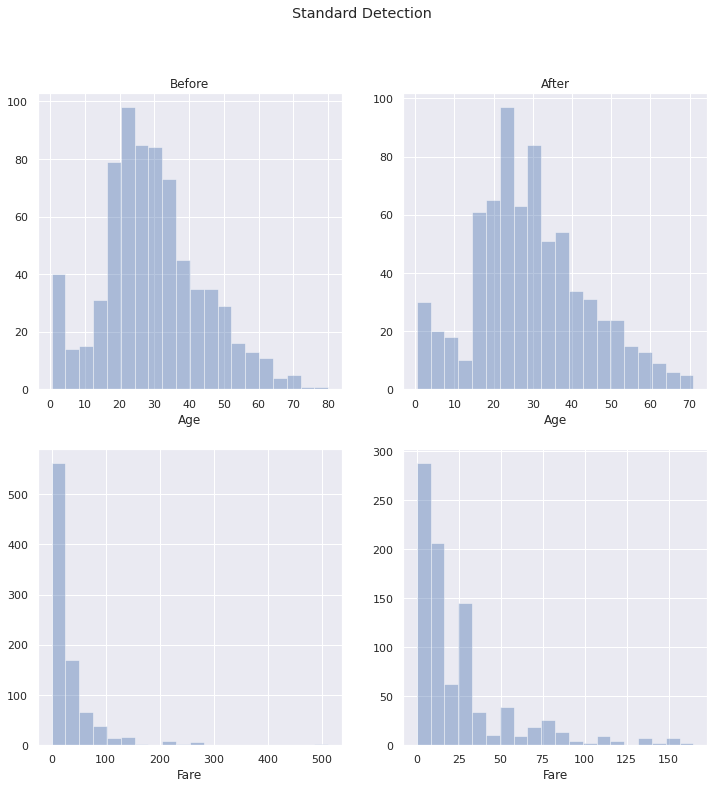

In [94]:
fig, axes=plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Standard Detection')
sns.distplot(train['Age'], kde=False, bins=20, ax=axes[0,0])
axes[0,0].set(title='Before')
sns.distplot(train_gauss['Age'], kde=False, bins=20, ax=axes[0,1])
axes[0,1].set(title='After')
sns.distplot(train['Fare'], kde=False, bins=20, ax=axes[1,0])
sns.distplot(train_gauss['Fare'], kde=False, bins=20, ax=axes[1,1])

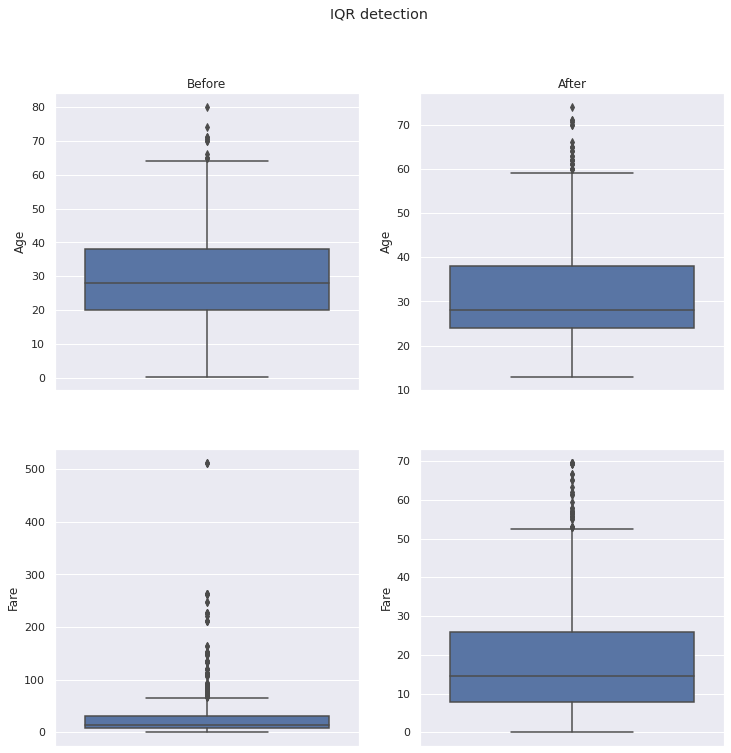

In [95]:
# IQR detection
train_iqr=train_outlier.IQR()
fig, axes=plt.subplots(2,2, figsize=(12,12))
fig.suptitle('IQR detection')
sns.boxplot(y=train['Age'], ax=axes[0,0])
axes[0,0].set(title='Before')
sns.boxplot(y=train_iqr['Age'], ax=axes[0,1])
axes[0,1].set(title='After')
sns.boxplot(y=train['Fare'], ax=axes[1,0])
sns.boxplot(y=train_iqr['Fare'], ax=axes[1,1])

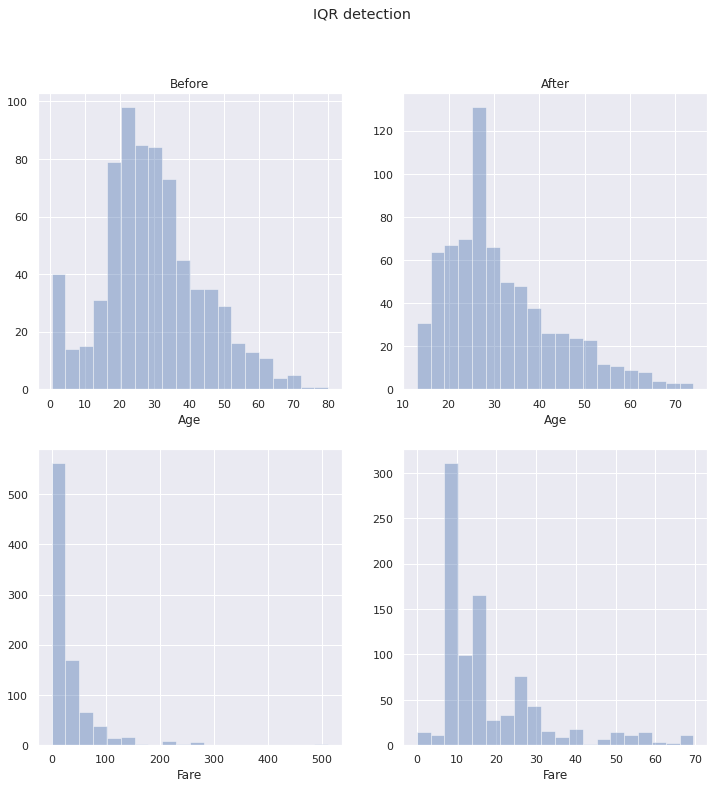

In [96]:
#Histplot for IQR detection
fig, axes=plt.subplots(2,2,figsize=(12,12))
fig.suptitle('IQR detection')
sns.distplot(train['Age'], kde=False, bins=20, ax=axes[0,0])
axes[0,0].set(title='Before')
sns.distplot(train_iqr['Age'], kde=False, bins=20, ax=axes[0,1])
axes[0,1].set(title='After')
sns.distplot(train['Fare'], kde=False, bins=20, ax=axes[1,0])
sns.distplot(train_iqr['Fare'], kde=False, bins=20, ax=axes[1,1])

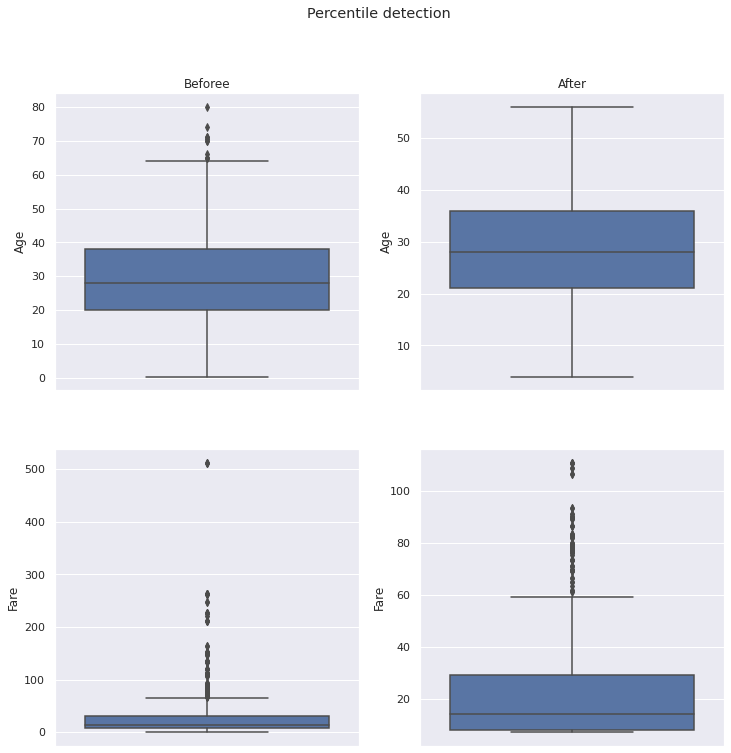

In [97]:
#Percentile Detection
train_centile=train_outlier.Percentile()
fig, axes= plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Percentile detection')
sns.boxplot(y=train['Age'], ax=axes[0, 0])
axes[0,0].set(title='Beforee')
sns.boxplot(y=train_centile['Age'], ax=axes[0, 1])
axes[0,1].set(title='After')
sns.boxplot(y=train['Fare'], ax=axes[1, 0])
sns.boxplot(y=train_centile['Fare'], ax=axes[1,1])

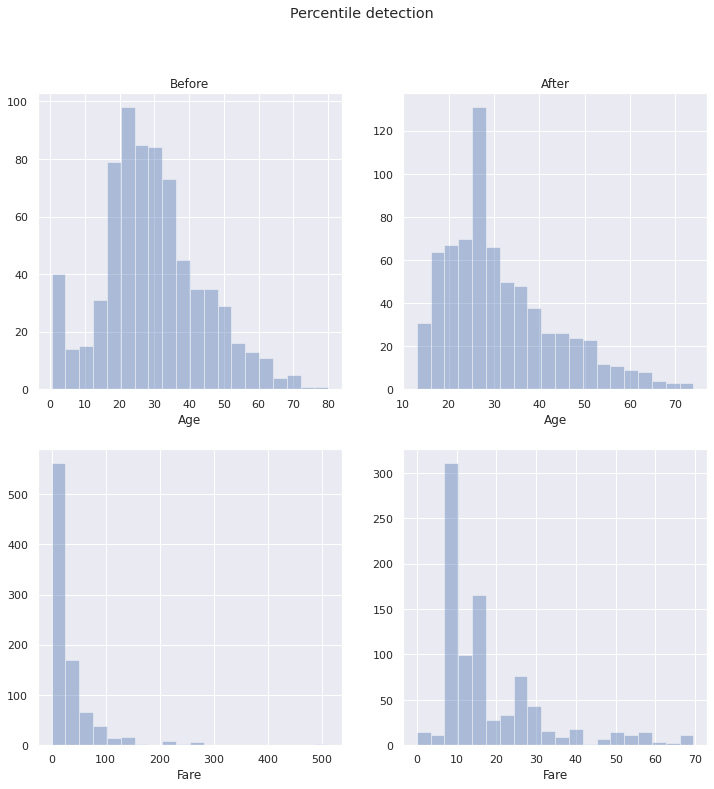

In [98]:
#Percetil detection
fig, axes=plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Percentile detection')
sns.distplot(train['Age'], kde=False, bins=20, ax=axes[0, 0])
axes[0,0].set(title='Before')
sns.distplot(train_iqr['Age'], kde=False, bins=20, ax=axes[0,1])
axes[0,1].set(title='After')
sns.distplot(train['Fare'], kde=False, bins=20, ax=axes[1, 0])
sns.distplot(train_iqr['Fare'], kde=False, bins=20, ax=axes[1,1])

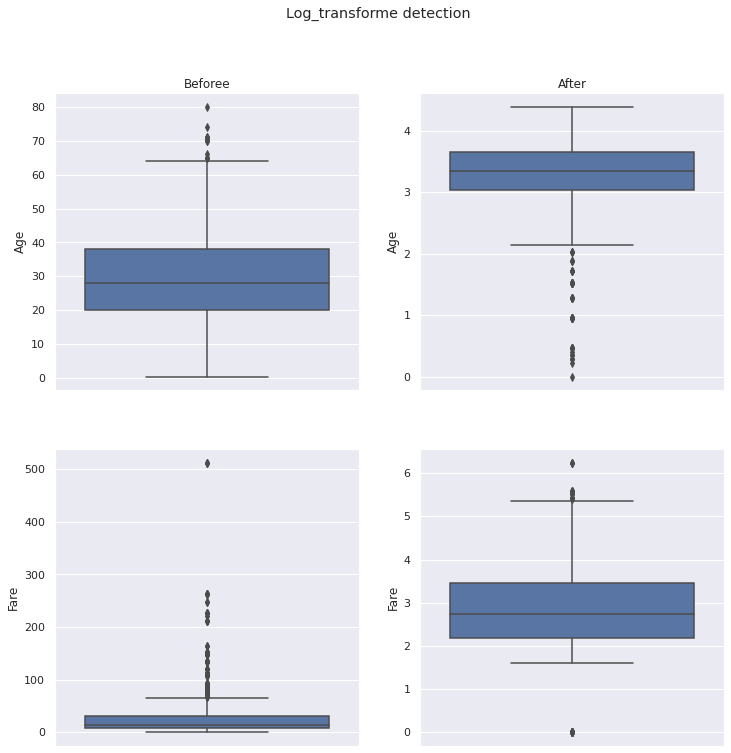

In [99]:
train_trans=train_outlier.Transforme()
fig, axes= plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Log_transforme detection')
sns.boxplot(y=train['Age'], ax=axes[0, 0])
axes[0,0].set(title='Beforee')
sns.boxplot(y=train_trans['Age'], ax=axes[0, 1])
axes[0,1].set(title='After')
sns.boxplot(y=train['Fare'], ax=axes[1, 0])
sns.boxplot(y=train_trans['Fare'], ax=axes[1,1])

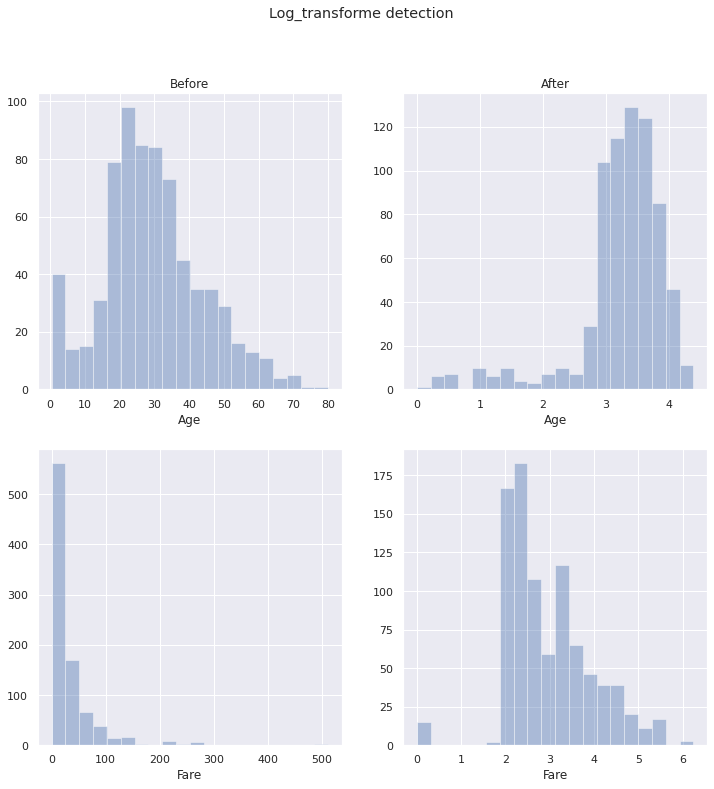

In [100]:
#Percetil detection
fig, axes=plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Log_transforme detection')
sns.distplot(train['Age'], kde=False, bins=20, ax=axes[0, 0])
axes[0,0].set(title='Before')
sns.distplot(train_trans['Age'], kde=False, bins=20, ax=axes[0,1])
axes[0,1].set(title='After')
sns.distplot(train['Fare'], kde=False, bins=20, ax=axes[1, 0])
sns.distplot(train_trans['Fare'], kde=False, bins=20, ax=axes[1,1])

In [104]:
des=train[['Age', 'Fare']]
des[['Age_Std', 'Fare_Std']]=train_gauss[['Age', 'Fare']]
des[['Age_IQR', 'Fare_IQR']]=train_iqr[['Age', 'Fare']]
des[['Age_Per', 'Fare_Per']]=train_centile[['Age', 'Fare']]
des[['Age_Trans', 'Fare_Trans']]=train_trans[['Age', 'Fare']]

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [105]:
des.describe()

,Age,Fare,Age_Std,Fare_Std,Age_IQR,Fare_IQR,Age_Per,Fare_Per,Age_Trans,Fare_Trans
count,714.000000,891.000000,714.000000,891.000000,714.000000,891.000000,649.000000,803.000000,714.000000,891.000000
mean,29.699118,32.204208,29.566622,26.657534,31.871148,18.056634,29.184129,24.242662,3.234469,2.962246
std,14.526497,49.693429,14.307353,29.031704,11.907759,13.927137,11.537395,22.508849,0.718381,0.969048
min,0.420000,0.000000,0.420000,0.000000,13.000000,0.000000,4.000000,7.225000,0.000000,0.000000
25%,20.125000,7.910400,20.125000,7.910400,24.000000,7.910400,21.000000,8.050000,3.030321,2.187218
50%,28.000000,14.454200,28.000000,14.454200,28.000000,14.454200,28.000000,14.454200,3.352707,2.737881
75%,38.000000,31.000000,38.000000,31.000000,38.000000,25.927100,36.000000,29.125000,3.652734,3.465736
max,80.000000,512.329200,71.000000,164.866700,74.000000,69.550000,56.000000,110.883300,4.389250,6.240917


### Model

1. Linear model

2. Tree models